# Figure 1
Example ICESat-2 ATL03 strong and weak beam bathymetry profiles over a supraglacial lake.

In [1]:
%matplotlib widget
# %load_ext autoreload
# %autoreload 2
from fig1code import *

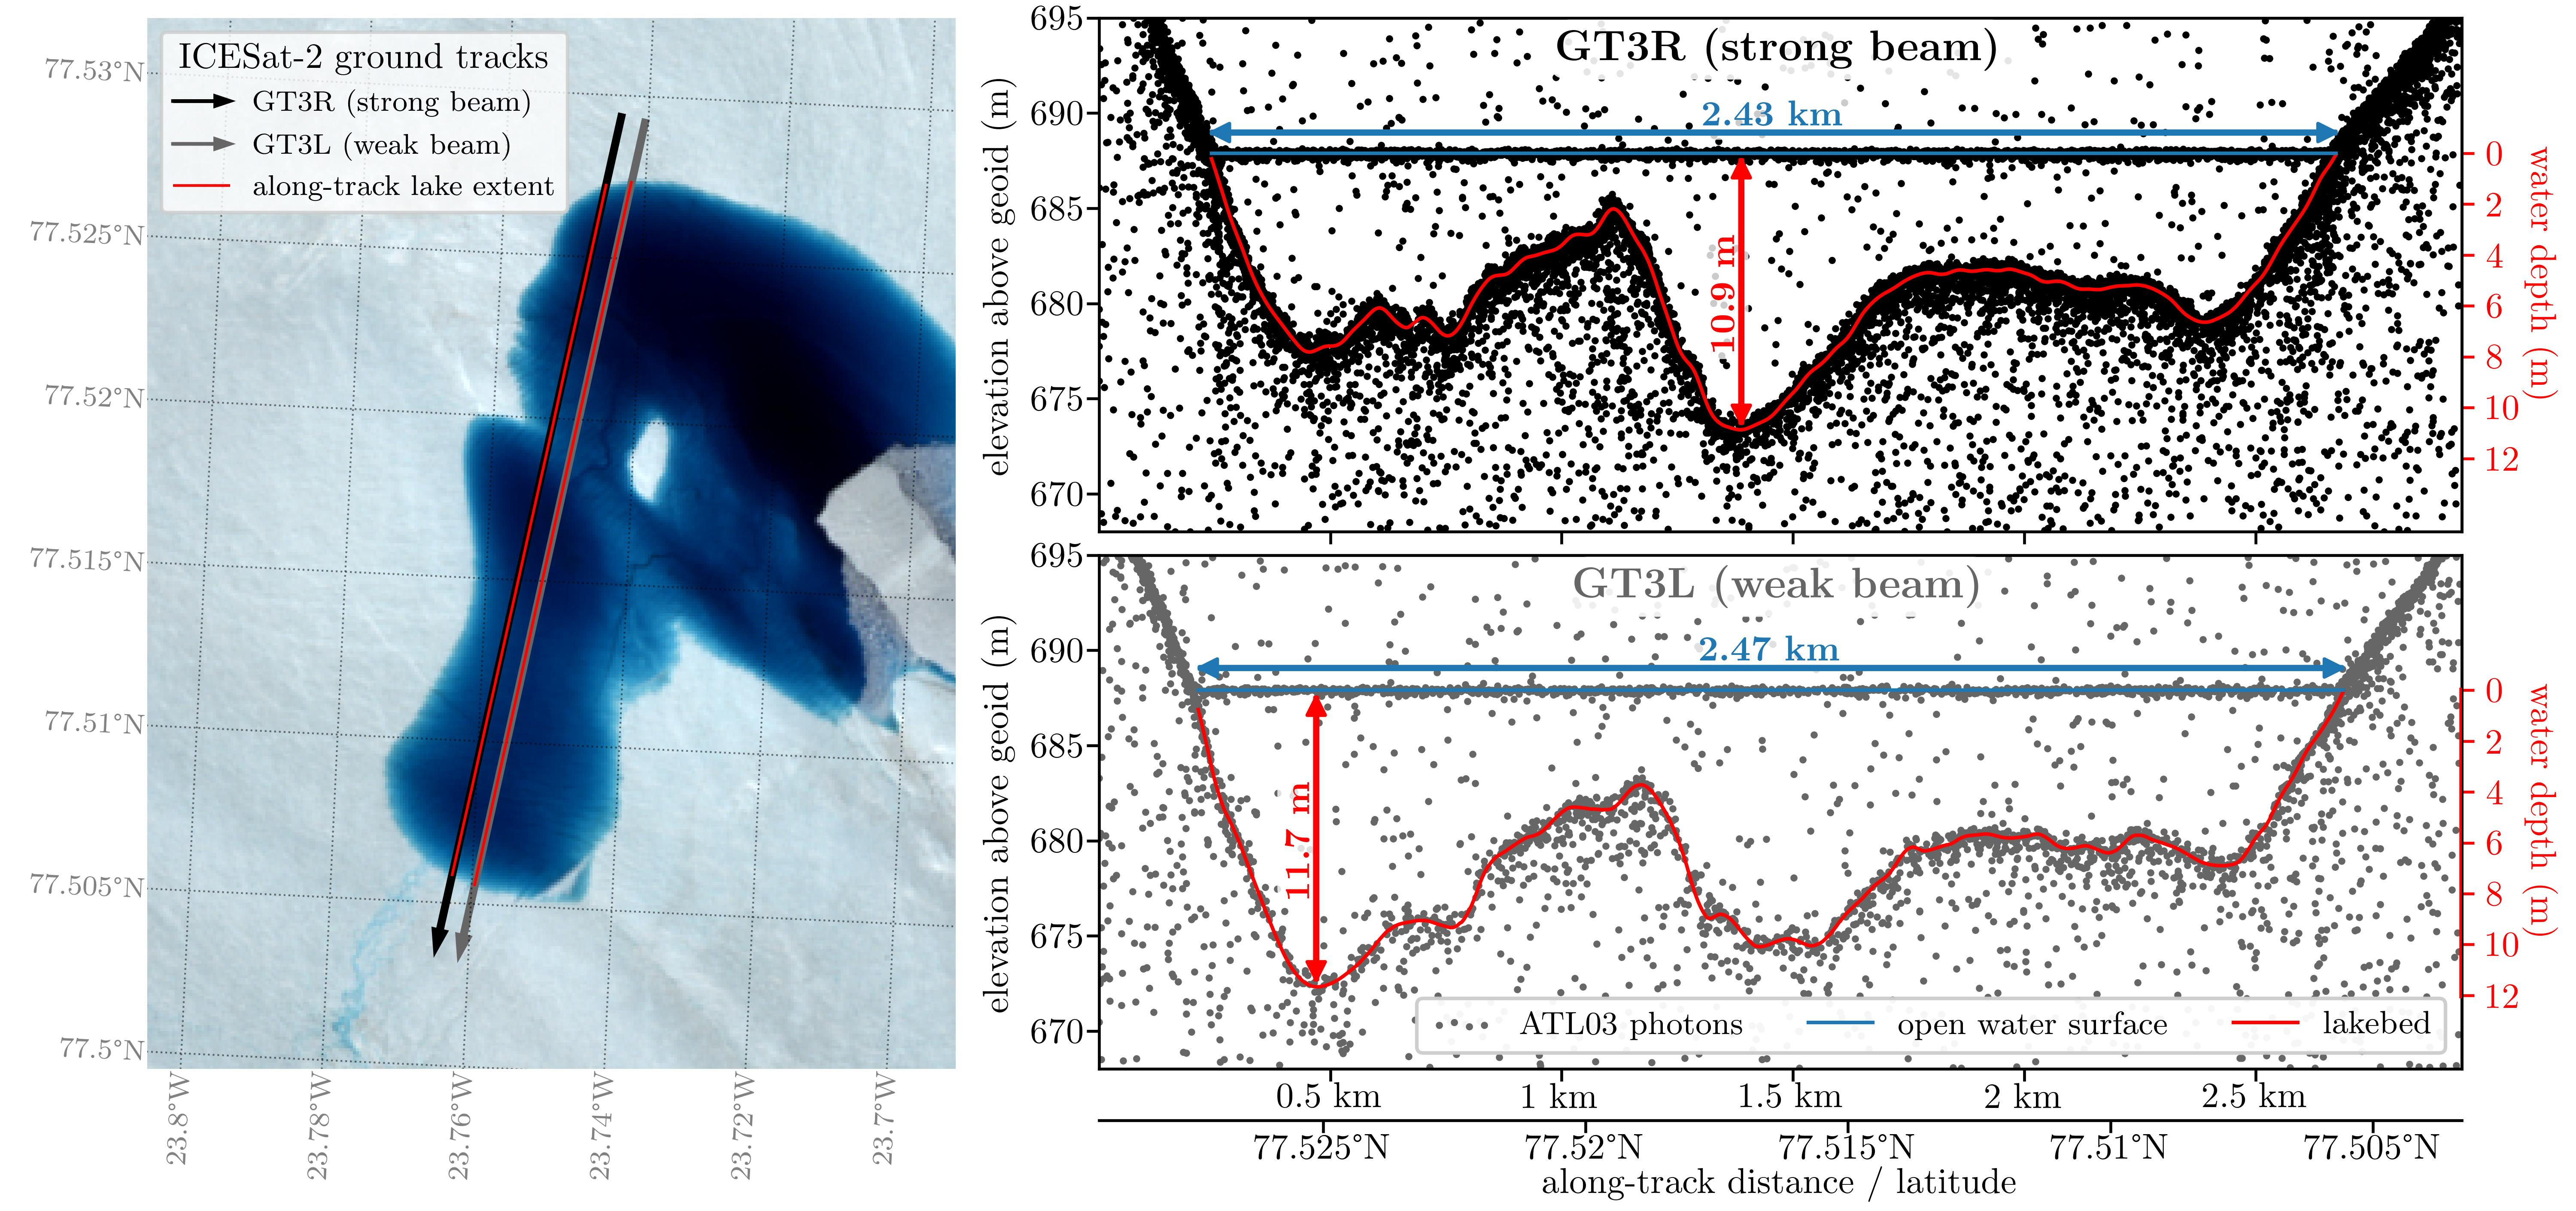


LAKE INFO: (strong beam)
  granule_id:            ATL03_20210720053125_04061205_006_01.h5
  RGT:                   406
  GTX:                   GT3R
  beam:                  1 (strong)
  acquisition time:      2021-07-20T05:32:05Z
  center location:       (23.75417W, 77.51659N)
  ice sheet:             GrIS
  melt season:           2021
  SuRRF lake quality:    82.42
  surface_elevation:     687.89 m
  maximum water depth:   10.87 m
  water surface length:  2.43 km


LAKE INFO: (weak beam)
  granule_id:            ATL03_20210720053125_04061205_006_01.h5
  RGT:                   406
  GTX:                   GT3L
  beam:                  2 (weak)
  acquisition time:      2021-07-20T05:32:05Z
  center location:       (23.75105W, 77.51613N)
  ice sheet:             GrIS
  melt season:           2021
  SuRRF lake quality:    33.20
  surface_elevation:     687.90 m
  maximum water depth:   11.66 m
  water surface length:  2.47 km
  IMAGERY INFO:
    product ID:                     S2B_MSIL2

In [2]:
# data inputs
fn_strong = 'data/lake_strong_beam.h5'
fn_weak = 'data/lake_weak_beam.h5'
imagery_filename = 'data/S2B_MSIL2A_20210720T151809_N0301_R068_T27XVG_20210720T175839.tif'

re_download = False # set this to True to download imagery from Gooogle Earth Engine again

# some parameters
ylm=[668,695]
img_aspect=1.3
weak_color = [0.4]*3
strong_color = 'k'

# figure setup
plt.rcParams.update({
    'font.size': 10,
    'text.usetex': True,
    'font.family': 'Optima'
})

# create figure and axes
fig = plt.figure(figsize=[10,4.7])
gs = fig.add_gridspec(ncols=5, nrows=2)
axs = []
axs.append(fig.add_subplot(gs[:, :2])) 
axs.append(fig.add_subplot(gs[1, 2:]))
axs.append(fig.add_subplot(gs[0, 2:], sharex=axs[-1]))

# plot stong beam data
ax = axs[2]
plotIS2(fn=fn_strong, ax=ax, xlm=[37,None], ylm=ylm, cmap=None, name='', phot_color=strong_color, add_legend=False, add_lat_ax=False)
plt.setp(ax.get_xticklabels(), visible=False)
lk = dictobj(read_melt_lake_h5(fn_strong))
title = r'\textbf{%s (%s beam)}' % (lk.gtx.upper(), lk.beam_strength)
ax.text(0.5, 0.98, title, color=strong_color, fontsize=12, ha='center', va='top', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.9, boxstyle='round,pad=0.2,rounding_size=0.5', lw=0), fontweight='bold')

# plot weak beam data
ax = axs[1]
plotIS2(fn=fn_weak, ax=ax, xlm=[None,-37], ylm=ylm, cmap=None, name='', phot_color=weak_color, add_legend=True, add_lat_ax=True)
lk = dictobj(read_melt_lake_h5(fn_weak))
title = r'\textbf{%s (%s beam)}' % (lk.gtx.upper(), lk.beam_strength)
ax.text(0.5, 0.98, title, color=weak_color, fontsize=12, ha='center', va='top', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.9, boxstyle='round,pad=0.2,rounding_size=0.5', lw=0), fontweight='bold')

# plot imagery
ax = axs[0]
img, center_lon, center_lat = plot_imagery(fn=fn_weak, days_buffer=5, max_cloud_prob=15, 
    gamma_value=1.0, imagery_filename=imagery_filename, re_download=re_download, ax=ax)

# add the ground tracks to the imagery plot
hdl_arr_strong, hdl_ext = add_gt_to_imagery(fn_strong, img, ax, xlm=[37,None],  arrow_width=15, arrow_col=strong_color, arrow_ls='-', line_col='r', line_width=0.75)
hdl_arr_weak  , hdl_ext = add_gt_to_imagery(fn_weak  , img, ax, xlm=[None,-37], arrow_width=15, arrow_col=weak_color,   arrow_ls='-', line_col='r', line_width=0.75)

ax.legend(handles=[hdl_arr_strong, hdl_arr_weak, hdl_ext], loc='upper left', fontsize=8, title='ICESat-2 ground tracks',
          handler_map={mpatches.FancyArrow : HandlerPatch(patch_func=make_legend_arrow)})

# set the proper aspect for the image
if (img_aspect > 1): 
    h_rng = img.bounds.top - img.bounds.bottom
    cntr = (img.bounds.right + img.bounds.left) / 2
    ax.set_xlim(cntr-0.5*h_rng/img_aspect, cntr+0.5*h_rng/img_aspect)
elif img_aspect < 1: 
    w_rng = img.bounds.right - img.bounds.left
    cntr = (img.bounds.top + img.bounds.bottom) / 2
    ax.set_ylim(cntr-0.5*w_rng*img_aspect, cntr+0.5*w_rng/img_aspect)

# add graticule and apply tight layout
add_graticule(img, ax)
fig.tight_layout(pad=0.5, h_pad=0.3, w_pad=0.4)

# save file
plotname = '../figures/fig01-example_plot_both_beams.jpg'
fig.savefig(plotname , dpi=600)
plt.close(fig)

# show plot and print info
display(Image(plotname))
print_lake_info(fn_strong, description='(strong beam)', print_imagery_info=False)
print_lake_info(fn_weak, description='(weak beam)')